<a href="https://colab.research.google.com/github/diegodorado1729/Coding/blob/main/Python/CD-2024/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dirección GitHub
# https://github.com/diegodorado1729/Coding/tree/main/Python/CD-2024

# Análisis de los Datos
----

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt

In [ ]:
# Autorizamos que collab acceda al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the main data
df = pd.read_csv('/content/drive/MyDrive/Lic. en Fisica/Machine Learning/Proyecto/games.csv')

print("El tamaño del DataFrame es: \n")
print(f'Shape: {df.shape}')

df.head()

El tamaño del DataFrame es: 

Shape: (51490, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


Las columnas `gameID`, `creationTime`, `seasonId` no aportan información relevante con respecto a quién ganó la partida. Por lo tanto decidimos eliminarlas.

In [ ]:
df = df.drop(columns=['gameId','creationTime','seasonId',])

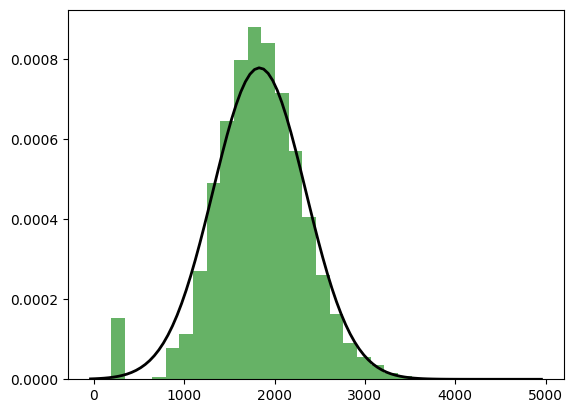

In [ ]:
from scipy import stats

data = df['gameDuration']

# Ajustar una distribución a los datos
dist = stats.norm
params = dist.fit(data)

# Histograma de los datos
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Crear una línea para la distribución ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = dist.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)

# Mostrar el gráfico
plt.show()


Podemos ver una gran cantidad de partidas que acabaron antes del minuto 15. Esto se debe al sistema "Renovar" que tiene el LoL cuando un jugador abandona la partida incluso antes de entrar (se denomina "AFK", Away From Keyboard). Estas partidas no cuenta ni como victoria ni como derrota para ninguno de los jugadores, así que lo mejor es sacarlas de nuestro análisis.

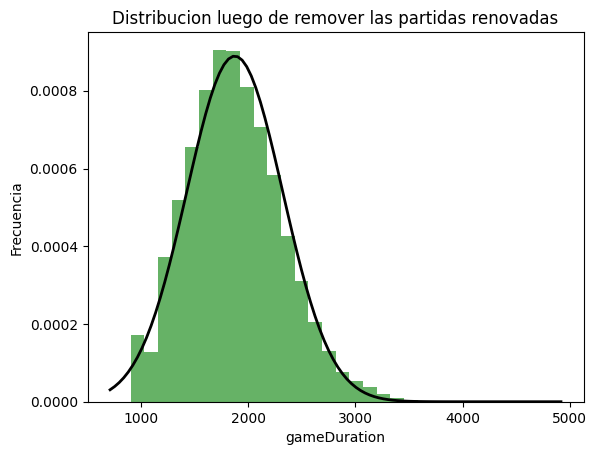

In [ ]:
df1 = df[df['gameDuration']>=900]
data = df1['gameDuration']

# Ajustar una distribución a los datos
dist = stats.norm
params = dist.fit(data)

# Histograma de los datos
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Crear una línea para la distribución ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = dist.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribucion luego de remover las partidas renovadas')
plt.xlabel('gameDuration')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

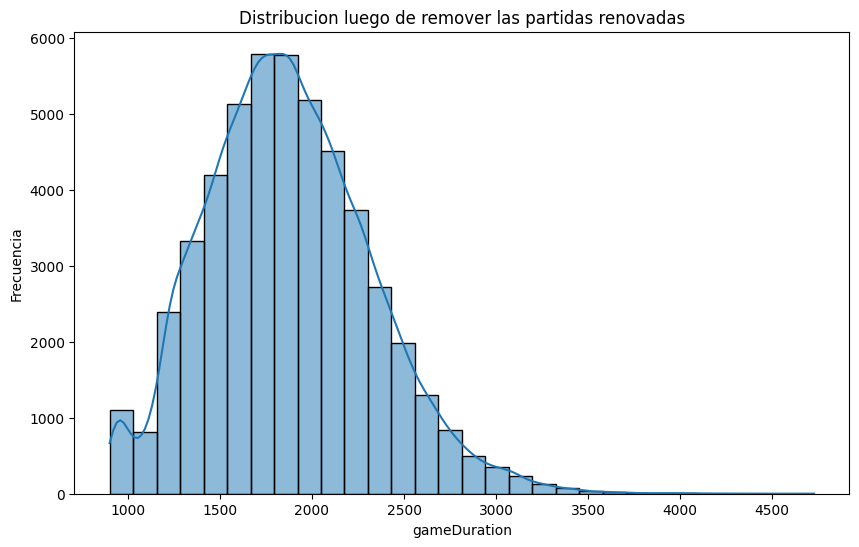

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True)  # Use kde=False to remove the kernel density estimate
plt.title('Distribucion luego de remover las partidas renovadas')
plt.xlabel('gameDuration')
plt.ylabel('Frecuencia')
plt.show()

# **PREGUNTA: Qué distribución nos combiene más?**

# Clasificadores

In [ ]:
#Separamos los conjuntos de train y testing
from sklearn.model_selection import train_test_split

X = df.drop('winner', axis=1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [ ]:
#Metricas y Matriz confusión

def metricas (y_test, y_pred):
  # Mostrar el classification report
  print("Classification Report:\n")
  print(classification_report(y_test, y_pred))

  # Mostrar la matriz de confusión
  print("Matriz Confusión:\n")
  ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
  plt.tight_layout()
  plt.show()

  return 0



## Navier-Bayes

Classification Report:

              precision    recall  f1-score   support

           1       0.93      0.95      0.94      8664
           2       0.95      0.93      0.94      8328

    accuracy                           0.94     16992
   macro avg       0.94      0.94      0.94     16992
weighted avg       0.94      0.94      0.94     16992

Matriz Confusión:



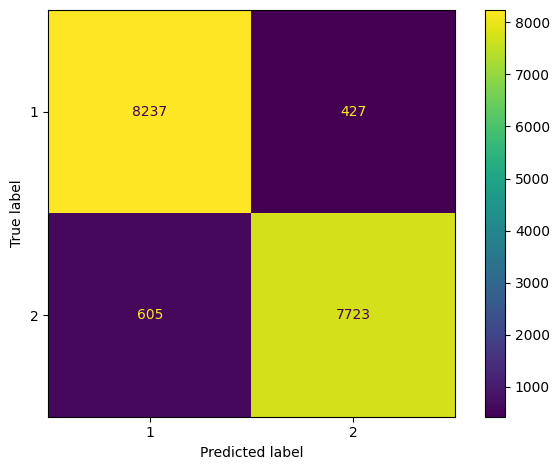

0

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = GaussianNB()
model.fit(X_train, y_train);
y_pred_nb = model.predict(X_test)

metricas(y_test, y_pred_nb)


## Perceptron

Classification Report:

              precision    recall  f1-score   support

           1       0.95      0.96      0.95      8664
           2       0.96      0.94      0.95      8328

    accuracy                           0.95     16992
   macro avg       0.95      0.95      0.95     16992
weighted avg       0.95      0.95      0.95     16992

Matriz Confusión:



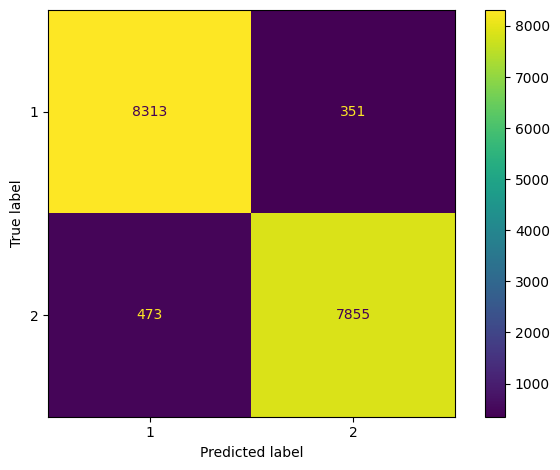

0

In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
y_pred_pt = perceptron.predict(X_test)

metricas(y_test, y_pred_pt)

## Regresión Lineal y Logística

preguntar como aplicar

Classification Report:

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      8664
           2       0.96      0.96      0.96      8328

    accuracy                           0.96     16992
   macro avg       0.96      0.96      0.96     16992
weighted avg       0.96      0.96      0.96     16992

Matriz Confusión:



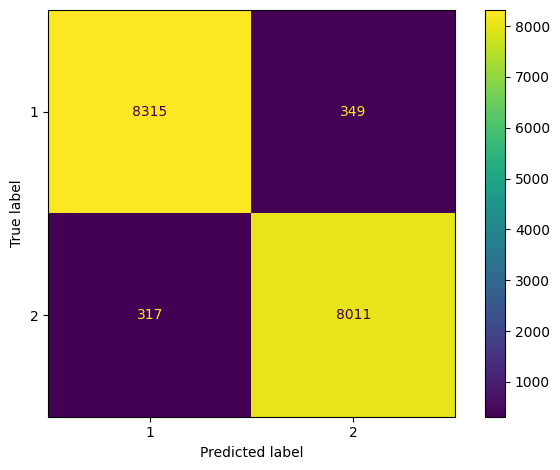

0

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

#Inicializar y entrenar el modelo LogisticRegressionCV
logistic_cv = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', tol=1e-6, max_iter=int(1e6))
logistic_cv.fit(X_train, y_train)

#Predecir con el modelo LogisticRegressionCV
y_pred_logistic_cv = logistic_cv.predict(X_test)

metricas(y_test, y_pred_logistic_cv)

## Vecinos cercanos

preguntar como implementar

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier

#Definir el modelo KNeighborsClassifier
#knn_model = KNeighborsClassifier()

#Definir los parámetros a buscar
#param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

#Definir el GridSearchCV con 10-fold cross-validation
#grid_search = GridSearchCV(knn_model, param_grid, cv=10)

#Entrenar el modelo usando GridSearchCV
#grid_search.fit(X_train, y_train)

# Obtener los resultados de GridSearchCV
#results = grid_search.cv_results_
#k_values = param_grid['n_neighbors']
#mean_test_scores = results['mean_test_score']

# Encontrar el índice del mejor valor de k
#best_k_idx = np.argmax(mean_test_scores)
#best_k = k_values[best_k_idx]

#Crear un nuevo modelo KNeighborsClassifier con el mejor valor de k encontrado
#best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

#Entrenar el modelo con los datos de entrenamiento completos (X_train, y_train)
#best_knn_model.fit(X_train, y_train)
#y_pred = best_knn_model.predict(X_test)

#Mostrar el classification report
#print("Classification Report:\n")
#print(classification_report(y_test, y_pred))

#Mostrar la matriz de confusión
#print("Matriz Confusión:\n")
#ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
#plt.tight_layout()
#

## Support Vector Machine

#Árboles de Decisión

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)